В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=true).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Решение должно представлять собой IPython-ноутбук, содержащий:

    код, генерирующий выборки и графики;
    краткие описания каждого блока кода, объясняющие, что он делает;
    необходимые графики (убедитесь, что на них подписаны оси);
    выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
    выводы по результатам выполнения задания.

In [2]:
#Импортируем библиотеки
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats as sts
import matplotlib
import pandas as pd
from scipy.stats import invweibull # Выбрали распределение Вейбулла
%matplotlib inline

In [3]:
#Сгенерируем из распределения Вейбулла выборку объёма 1000
weib = sts.invweibull(c=5, scale=1, loc=0)# c - коэффициент формы, scale - коэффициент масштаба
sample = weib.rvs (size=1000) # Объем выборки - 1000

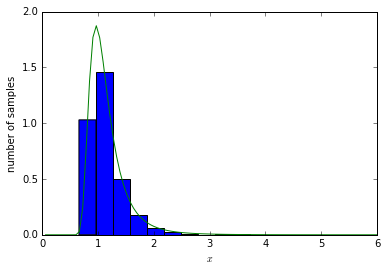

In [10]:
#Построим график теоретической плотности распределения случайной величины и гистограмму выборки
plt.hist(sample, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')
x = np.linspace(0, 6, 100)
pdf = weib.pdf(x)
plt.plot(x, pdf)

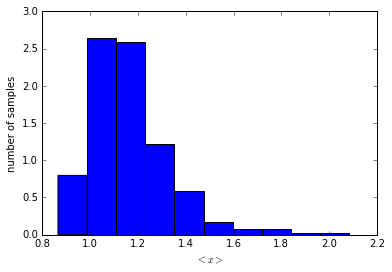

In [11]:
# Гистограмма распределения выборочных средних для 1000 выборок объема 5
a1=[] # Инициализируем список
i=0
while i!= 1000: # Запускаем цикл, который получает 1000 выборок и находит выборочное среднее для каждой с помощью метода mean()
    a1 = np.hstack((a1, weib.rvs(size=5).mean())) # С помощью функции hstack добавляем в список "a1" выборочное среднее для каждой выборки
    i=i+1
plt.hist(a1, normed=True) # Строим гистограмму
plt.ylabel('number of samples')
plt.xlabel('$<x>$')

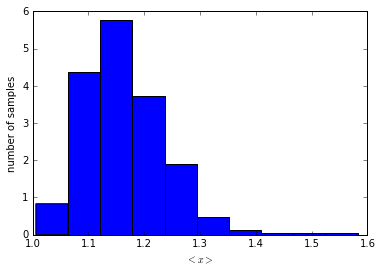

In [12]:
# Гистограмма распределения выборочных средних для 1000 выборок объема 30
a2=[]
i=0
while i!= 1000:
    a2 = np.hstack((a2, weib.rvs(size=30).mean()))
    i=i+1
g2 = plt.hist(a2, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$<x>$')

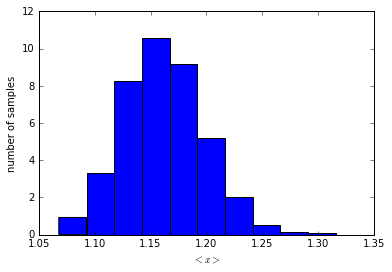

In [13]:
# Гистограмма распределения выборочных средних для 1000 выборок объема 100
a3=[]
i=0
while i!= 1000:
    a3 = np.hstack((a3, weib.rvs(size=100).mean()))
    i=i+1
plt.hist(a3, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$<x>$')

Для математического ожидания используем формулу: $ \mu = \lambda \Gamma (1 + 1 / k) $, а для дисперсии $ - $ $ \sigma ^2 = \lambda ^2 \Gamma (1 + 2/k) - \mu ^2 $ , где $ \lambda -$ коэффициент масштаба, $ k -$ коэффициент формы. Ссылка на источник:https://ru.wikipedia.org/wiki/Распределение_Вейбулла

In [7]:
c = 5. # Оба коэффициента используются при инициализации распределения Вейбулла
L = 1.
Mu = L * math.gamma(1. + 1./c) # Посчитали математическое ожидание
s2 = (L**2) * math.gamma(1. + 2./c) - Mu**2 # Посчитали дисперсию
print Mu, s2

0.9181687424 0.0442299779831


In [8]:
Mu = np.mean(sample)

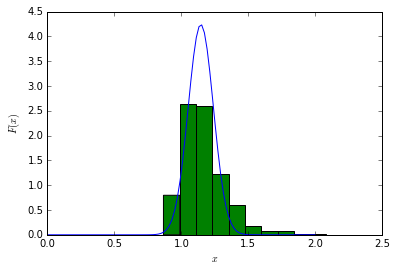

In [14]:
# Найдём и построим плотность нормального распределения, соответствующего распределению выборочных средних объёма 5
norm_rv1 = sts.norm(loc=Mu, scale=math.sqrt(s2/5)) # В качестве коэффициента масштаба берём отношение стандартного отклонения к корню объёма выборки
x = np.linspace(0,2,100)
pdf1 = norm_rv1.pdf(x) # Находим функцию плотности вероятности нормального распределения
plt.plot(x, pdf1)
plt.hist(a1, normed=True)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

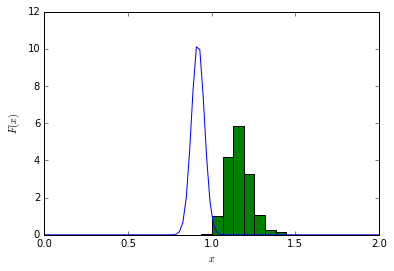

In [215]:
# Найдём и построим плотность нормального распределения, соответствующего распределению выборочных средних объёма 30
norm_rv2 = sts.norm(loc=Mu, scale=math.sqrt(s2/30)) # В качестве коэффициента масштаба берём отношение стандартного отклонения к корню объёма выборки
x = np.linspace(0,2,100)
pdf2 = norm_rv2.pdf(x) # Находим функцию плотности вероятности нормального распределения
plt.plot(x, pdf2)
plt.hist(a2, normed=True)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

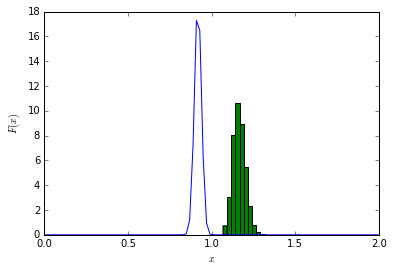

In [280]:
# Найдём и построим плотность нормального распределения, соответствующего распределению выборочных средних объёма 100
norm_rv3 = sts.norm(loc=Mu, scale=math.sqrt(s2/100)) # В качестве коэффициента масштаба берём отношение стандартного отклонения к корню объёма выборки
x = np.linspace(0,2,100)
pdf3 = norm_rv3.pdf(x) # Находим функцию плотности вероятности нормального распределения
plt.plot(x, pdf3)
plt.hist(a3, normed=True)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Выводы: Выбранное нами распределение плохо описывается нормальным.